In [164]:
import scipy
import numpy as np 
import matplotlib.pylab as plt 
% matplotlib inline 

X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

#Because we are predicting a score, this would be a regression set. 
#If we were predicting a letter grade, this would be a classification set. 

X = X/np.amax(X, axis=0)
y = y/100 #Because max test score is 100

#This is the scaling step (Above) 

In this section, we are creating an artificial neural network. These artificial neural networks work in a similar fashion to the neural networks inside of a brain. Artificial Neural Networks can be used for image classification, natural language processing and Cat classification. These artificial neural networks can complete very complex mathamatical equations to solve very difficult problems. 

In this section, we also have to scale our data. Neural Networks are not able to recognize that one of our inputs is measured in hours, while the other one is measured on a score from 0 to 100. We can scale our data to create one common varibale counter type.

After scaling, we create the neural network structure. In the module, synapses take a value from an input, then multiply it by a specific weight, and output the result. The neurons in the network are responsible for adding all of the synapse values together, and then apply an activation function. Complex activation functions allow neural networks to model complex, nonlinear patterns. 

We are using the sigmoid activation function in this model. 

In [165]:
class Neural_Network(object):
    def __init__(self):
        #Define HyperParameters
        #Self function makes code assessible to entire class
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (Parameters)
        self.W1 = np.random.randn(self.inputLayerSize, \
                                 self.hiddenLayerSize) 
        self.W2 = np.random.randn(self.hiddenLayerSize, \
                                 self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs through network 
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activaiton function 
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        #Derivative of Sigmoid Function 
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W1 and W2
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        
        return dJdW1, dJdW2
    
    #Helps Functions for interacting with other classes
    def getParams(self):
        #Get W1 and W2 uncrolled into vector 
        params = np.concatenate((self.W1.ravel(), self.W2.ravel())
)
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
        
    


In [166]:
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4
        
        for p in range(len(paramsInitial)):
            #Set perturbation vector 
            perturb[p] = e 
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X,y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)
            
            #Compute Numerical Gradient:
            numgrad[p] = (loss2-loss1) / (2*e)
            
            #Return the value we changed back to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)
        
        return numgrad

In [167]:
 NN = Neural_Network();

This is the Neural Network class. HyperParameters are constants which establish the structure and behavior of our network but are not updated as we create the network. The neural networks are able to learn the parameters though. 

The Forward function within the network allows us to pass multiple inputs through our hidden layer at a time, using matrices. Our matrix dimention for x is 3 by 2, as we have three data points. Each point contains one value for hours slept and one value for hours spent studying. Our corresponding output data (y) has a dimension of 3 by 1. Three different results with a single output score for each one. 

Each value within the matrix must be multiplied by a weight and added together again to create an output (for each neuron). To accomplish this, we use matrix multiplication. We must also apply our sigmoid activation fuction to each value within the matrix. After this step is complete, we can add our weights into a nex matrix and pass in a new activation function to get our output, or our y-hat value. 

We have succesfully created a neural network! Unfortunently, it does not work very well, and its accuracy is quite low. This is because we have not trained our network yet. 

Inorder to train our data, we first need to figure out how wrong the data is. We can accomplish this by using a cost function. A cost function is computed by taking each error value and squaring them and then adding them all together. An important note to keep in mind is: when someone is saying that they are training a network, they mean that they are minimizing a cost function. We can minimize our cost by chaning our weights. We cannot plug and chug to find an optimal value which yields the lowest cost function. This cannot be done because we have 9 weigths with over 1 billion outcomes. It would take longer than the existance of the universe for the computer to complete this algorithim. Instead, we can use derivatives and partial derivatives to find the slope or rate of change of our function, in terms of our weight matrix. If our derivative is positive, our cost function has an increasing slope. If it is negative, it has a decreasing slope. This method is known as gradient decent. This method saves a very large amount of time with higher amounts of time. 

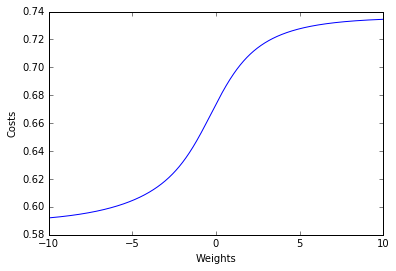

In [168]:
import time 

weightsToTry = np.linspace(-10,10,1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()

plt.plot(weightsToTry, costs)
plt.ylabel('Costs')
plt.xlabel('Weights')

The above graph represents our cost function. We want to find a global minima, or minimum point on the data curve to minimize our cost function. 

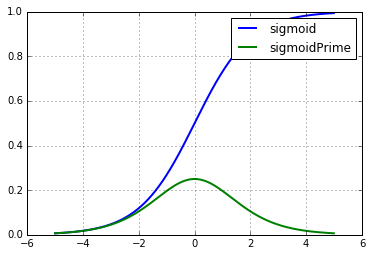

In [169]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, NN.sigmoid(testValues), linewidth = 2)
plt.plot(testValues, NN.sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])

This is a a sigmoig graph and its derivative. The derivative graph shows the rate of change of the sigmoid graph. 

In [170]:
cost1 = NN.costFunction(X,y)

In [171]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

The next step is checking for computational errors. We need the check the accuracy of our math in our costFunctionPrime code. We use the power and chain rule to find this derivative. We can check our solution by also finding the derivative using its definiton formula, rise over run. The numerator of the equation gives us the change in y values, and the denominator expresses the change of y values as the limit of h tends towards zero. 

In [172]:
numgrad = computeNumericalGradient(NN, X, y)
numgrad

array([ 0.00047697,  0.03388065,  0.02361985,  0.00117567,  0.02067798,
        0.0185033 , -0.24452547, -0.19626891, -0.08637378])

In [173]:
grad = NN.computeGradients(X, y)
grad

array([ 0.00047697,  0.03388065,  0.02361985,  0.00117567,  0.02067798,
        0.0185033 , -0.24452547, -0.19626891, -0.08637378])

In [174]:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

6.1569132758512851e-11

This code normalizes our data to increase the network's accuracy. 

In [175]:
from scipy import optimize 

In [176]:
class trainer(object):
    def __init__(self, N):
        #Make local references to Neural Network 
        self.N = N
    
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        return cost, grad
    
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        
    def train(self, X, y):
        #Make internal variable for callback function 
        self.X = X
        self.y = y
        
        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()
        
        options = {'maxiter':200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, \
                                 jac = True, method = 'BFGS', args = (X,y),\
                                 options=options, callback=self.callbackF)
        
        self.N.setParams(_res.X)
        self.optimizationResults = _res

In order to make our predicitons more accurate we need to create a training module. This code trains our classifier to output a reliable output, in relation to the costfunction. This is a reliable method for optimizing and fitting our data. Before we creating a train method, our data was unpredictable. After creating and running the train, our data is more likley to be correctly and accuratly interperated by the network to output an accurate output. 

In [177]:
T = trainer(NN) 

In [178]:
T.train(X, y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 68
         Function evaluations: 96
         Gradient evaluations: 95


AttributeError: X

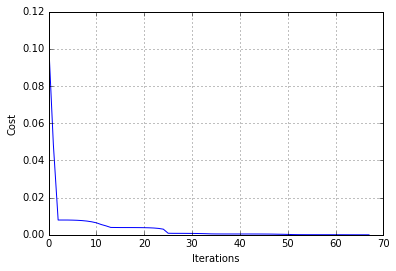

In [179]:
plt.plot(T.J)
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Iterations')

In [180]:
NN.costFunctionPrime(X,y)

(array([[  2.09566125e-08,  -3.95503484e-07,   1.99340137e-06],
        [  8.84919437e-09,  -1.70282903e-07,   1.26516913e-06]]),
 array([[ -1.64374015e-06],
        [ -2.20477610e-06],
        [ -3.80065927e-07]]))

In [181]:
NN.forward(X)

array([[ 0.74999803],
       [ 0.81996946],
       [ 0.93003608]])

In [182]:
#Test network for various combinations of sleep/study:
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = plt.meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()


In [183]:
allOutputs = NN.forward(allInputs)

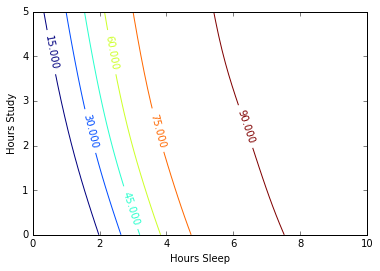

In [184]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')

This shows the ranges of Hours studied and hours slept and the corresponding test scores predicted by the algorithm.  

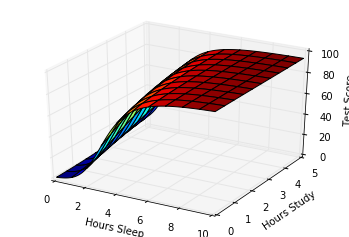

In [185]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=plt.cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

This is a 3D representation of our data. The three demension shows that our predictions are quite accurate (appears linear in a 3 demensional sense). 

In [191]:
NN.forward([0,4])

array([ 0.7463409])

In [192]:
NN.forward([1,2])

array([ 0.9400161])

We can now use the forward function to predict a future test score. In conclusion, I found that sleep hours are much more important than study hours. Extra sleep and less studying yields higher test resuts than more studying and less sleep. Inorder to deal with outliers in the data, we can overfit our neural network in the future to make its predictions more accurate. 